In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
import wrangle
from acquire import get_zillow_data
# Statistical Tests
import scipy.stats as stats

# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

#Modeling Imports
from sklearn.model_selection import learning_curve
from sklearn.cluster import KMeans, dbscan
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, LassoLars
from sklearn.preprocessing import PolynomialFeatures


pd.options.display.float_format = '{:20,.2f}'.format
pd.set_option('display.max_columns', 80)

## Acquire

In [2]:
acquired_zillow =get_zillow_data()

In [3]:
acquired_zillow.shape

(77575, 69)

In [4]:
acquired_zillow.describe()

,Unnamed: 0,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,logerror
count,"77,575.00","77,575.00","77,575.00","25,006.00",206.00,50.00,"77,575.00","77,575.00",15.00,"49,809.00","76,960.00",614.00,"6,035.00","77,375.00","73,920.00",42.00,"3,027.00","6,035.00",386.00,"77,575.00","8,287.00","76,960.00","25,517.00","25,517.00","1,539.00","49,570.00","77,575.00","77,575.00","69,318.00","16,173.00",869.00,465.00,"1,074.00","15,078.00","77,575.00","77,575.00","76,103.00","77,575.00","30,973.00","77,525.00","77,575.00",50.00,"10,105.00",222.00,"50,703.00","2,393.00",70.00,"77,306.00","17,596.00",172.00,"77,460.00","77,574.00","77,575.00","77,573.00","77,570.00","2,900.00","77,328.00","77,575.00"
mean,"38,787.00","1,495,352.00","13,006,298.98",1.81,7.39,679.72,2.30,3.05,3.93,6.53,2.32,66.00,"1,366.20","1,784.94","1,760.29","1,388.76","2,354.49","1,381.43","2,082.50","6,048.81",1.19,2.25,1.82,350.06,1.00,3.92,"34,008,366.13","-118,203,713.57","29,974.45",1.00,517.93,1.00,1.00,1.00,261.82,"60,491,228.76","33,683.39","2,534.54","187,730.30","96,586.68",1.48,7.00,1.01,6.04,1.11,305.46,216.39,"1,968.61",1.43,1.00,"189,281.45","490,144.70","2,016.00","301,145.30","5,995.82",14.09,"60,496,658,430,262.86",0.02
std,"22,394.12","860,970.27","3,478,020.75",2.97,2.73,689.70,1.00,1.14,0.26,1.72,0.98,0.00,670.80,954.26,934.36,122.22,"1,186.99",725.90,"1,240.38",20.75,0.49,0.97,0.59,261.65,0.00,3.59,"265,287.75","359,382.61","123,307.62",0.00,156.57,0.00,0.00,0.00,5.14,"205,876.80","47,212.86",801.45,"165,045.23","3,793.65",2.82,0.00,0.12,0.56,1.17,238.74,190.18,23.79,0.54,0.00,"230,413.73","653,802.18",0.00,"492,728.73","7,628.87",2.18,"1,533,375,678,743.79",0.17
min,0.00,349.00,"10,711,855.00",1.00,2.00,38.00,0.00,0.00,3.00,1.00,1.00,66.00,44.00,128.00,128.00,"1,056.00",598.00,44.00,380.00,"6,037.00",1.00,1.00,0.00,0.00,1.00,1.00,"33,339,527.00","-119,475,416.00",236.00,1.00,24.00,1.00,1.00,1.00,31.00,"60,371,011.10","3,491.00","1,286.00","6,952.00","95,982.00",0.00,7.00,1.00,4.00,1.00,11.00,12.00,"1,824.00",1.00,1.00,44.00,"1,000.00","2,016.00",161.00,19.92,3.00,"60,371,011,101,000.00",-4.66
25%,"19,393.50","752,105.00","11,538,198.00",1.00,7.00,273.00,2.00,2.00,4.00,6.00,2.00,66.00,955.00,"1,182.00","1,172.00","1,344.00","1,624.00",956.00,993.75,"6,037.00",1.00,2.00,2.00,0.00,1.00,2.00,"33,814,629.00","-118,415,000.00","5,700.00",1.00,424.00,1.00,1.00,1.00,261.00,"60,373,109.00","12,447.00","1,286.00","46,736.00","96,193.00",0.00,7.00,1.00,6.00,1.00,170.00,61.50,"1,953.00",1.00,1.00,"84,182.00","206,898.50","2,016.00","85,293.00","2,712.63",14.00,"60,373,109,004,005.00",-0.02
50%,"38,787.00","1,498,195.00","12,530,531.00",1.00,7.00,515.00,2.00,3.00,4.00,6.00,2.00,66.00,"1,257.00","1,542.00","1,523.00","1,440.00","2,088.00","1,259.00","1,812.50","6,037.00",1.00,2.00,2.00,436.00,1.00,2.00,"34,022,000.00","-118,181,000.00","7,206.00",1.00,500.00,1.00,1.00,1.00,261.00,"60,376,031.02","25,218.00","3,101.00","118,849.00","96,389.00",0.00,7.00,1.00,6.00,1.00,250.00,164.50,"1,970.00",1.00,1.00,"136,404.50","358,878.50","2,016.00","203,174.00","4,448.26",15.00,"60,376,032,001,020.00",0.01
75%,"58,180.50","2,240,715.00"

In [5]:
null_counts = acquired_zillow.isnull().sum().sort_values(ascending=False)
null_counts

buildingclassdesc       77560
buildingclasstypeid     77560
finishedsquarefeet13    77533
storydesc               77525
basementsqft            77525
                        ...  
assessmentyear              0
logerror                    0
transactiondate             0
propertylandusedesc         0
Unnamed: 0                  0
Length: 69, dtype: int64

### Takeaways:
##### There are numerous null values that need to be handled
#### Columns with too many nulls need to be dropped from the data frame.
##### There are many outliers so they either need to be removed or handled by using a RobustScaler when scaling the data.

## Prepare

In [6]:
df= wrangle.wrangle_zillow()

In [7]:
df.head() 

,parcelid,bathrooms,bedrooms,buildingquality,square_feet,fips,latitude,longitude,lot_size,regionidcity,regionidcounty,regionidzip,roomcnt,unit_count,age,structure_tax_value,tax_value,assessmentyear,land_tax_value,taxamount,logerror,transactiondate,heating_system,county
0,10711855,2.00,3.00,8.00,"2,107.00",6037,"34,222,559.00","-118,617,387.00","9,158.00","12,447.00","3,101.00","96,339.00",0.00,1.00,45.00,"249,655.00","624,139.00","2,016.00","374,484.00","7,659.36",-0.01,2017-07-07,Central,Los_Angeles
1,10711877,2.00,4.00,8.00,"1,882.00",6037,"34,220,261.00","-118,616,409.00","9,035.00","12,447.00","3,101.00","96,339.00",0.00,1.00,45.00,"253,000.00","660,000.00","2,016.00","407,000.00","8,123.91",0.02,2017-08-29,Central,Los_Angeles
2,10711888,2.00,4.00,8.00,"1,882.00",6037,"34,222,491.00","-118,616,854.00","9,800.00","12,447.00","3,101.00","96,339.00",0.00,1.00,45.00,"257,591.00","542,923.00","2,016.00","285,332.00","6,673.24",0.08,2017-04-04,Central,Los_Angeles
3,10711910,2.00,3.00,8.00,"1,477.00",6037,"34,221,864.00","-118,615,739.00","11,285.00","12,447.00","3,101.00","96,339.00",0.00,1.00,57.00,"57,968.00","78,031.00","2,016.00","20,063.00","1,116.46",-0.04,2017-03-17,Central,Los_Angeles
4,10711923,2.00,4.00,8.00,"1,918.00",6037,"34,220,619.00","-118,615,253.00","11,239.00","12,447.00","3,101.00","96,339.00",0.00,1.00,57.00,"167,869.00","415,459.00","2,016.00","247,590.00","5,239.85",-0.01,2017-03-24,Central,Los_Angeles


(array([2.0000e+00, 1.0000e+00, 2.3000e+01, 1.7000e+01, 1.3200e+02,
        6.6038e+04, 3.1410e+03, 1.2600e+02, 9.9000e+01, 1.3000e+01]),
 array([-4.65542038, -3.85042393, -3.04542749, -2.24043104, -1.4354346 ,
        -0.63043816,  0.17455829,  0.97955473,  1.78455118,  2.58954762,
         3.39454407]),
 <a list of 10 Patch objects>)

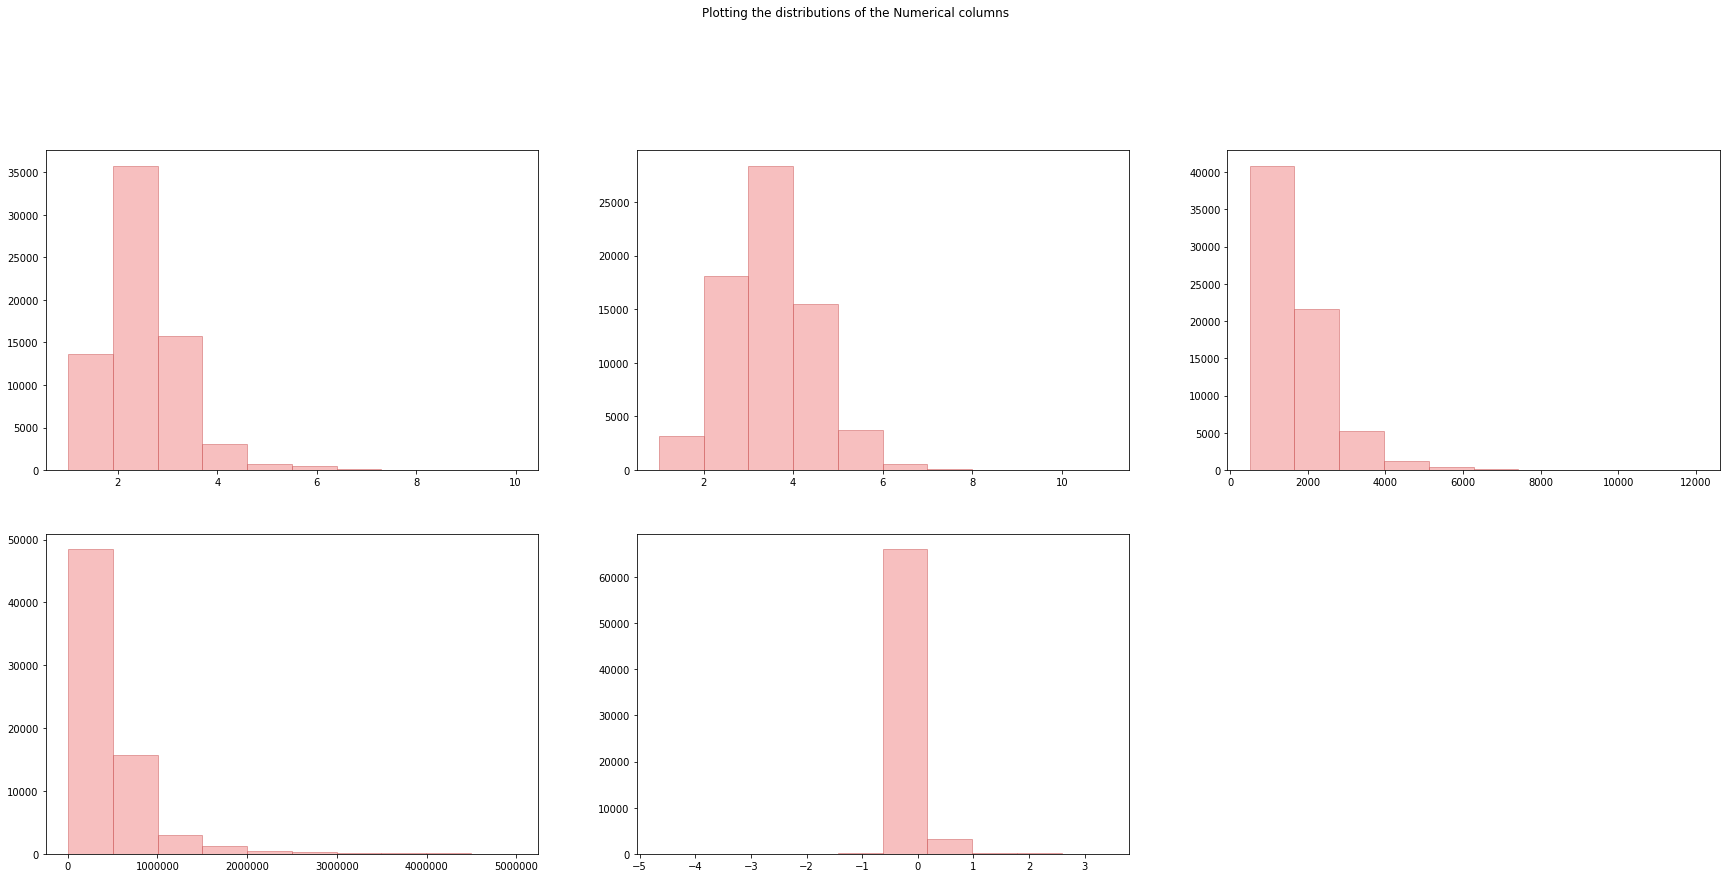

In [9]:
plt.figure(figsize=(30, 20))

plt.suptitle("Plotting the distributions of the Numerical columns")
# row, columns, index
plt.subplot(3, 3, 1)
plt.hist(df.bathrooms, edgecolor='indianred', alpha=0.5, color='lightcoral')
plt.subplot(3, 3, 2)
plt.hist(df.bedrooms, edgecolor='indianred', alpha=0.5, color='lightcoral')
plt.subplot(3, 3, 3)
plt.hist(df.square_feet, edgecolor='indianred', alpha=0.5, color='lightcoral')
plt.subplot(3, 3, 4)
plt.hist(df.tax_value, edgecolor='indianred', alpha=0.5, color='lightcoral')
plt.subplot(3, 3, 5)
plt.hist(df.logerror, edgecolor='indianred', alpha=0.5, color='lightcoral')

In [ ]:
X_train, y_train, X_validate, y_validate, X_test, y_test = wrangle.data_split(df,stratify_by='logerror')

In [ ]:
train_validate, test = train_test_split(df, test_size=.30, random_state=123)
train, validate = train_test_split(train_validate, test_size=.20, random_state=123)

print("train observations: ", train.size)
print("validate observations: ", validate.size)
print("test observations: ", test.size)

### Takeaways:
##### Dropped unneeded columns
##### Renamed columns to make easier to call
##### Split data and scaled data
##### Data is ready for exploration

## Explore

First Hypothesis :  <br>
𝐻0: There is no difference in log error based on a properties square footage. <br>
𝐻𝑎: Properties with a square footage less than 2800 square footage have a lower log error than larger properties. 

Second Hypothesis: <br>
𝐻0 : There is no difference in median log error in properties built in different years. <br>
𝐻𝑎 : Properties that were built after 1975 have a higher median log error than properties built before 1975.
<br><br>

Third Hypothesis: <br>
𝐻0 : There is no correlation between latitude and log error. <br>
𝐻𝑎 : Properties that are more southern have a higher log error.

## Model

## Conclusion